In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
data = pd.read_csv(r'C:\Users\ozgek\OneDrive\Masaüstü\heart.csv')

In [154]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [155]:
data.shape

(918, 12)

In [156]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [158]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

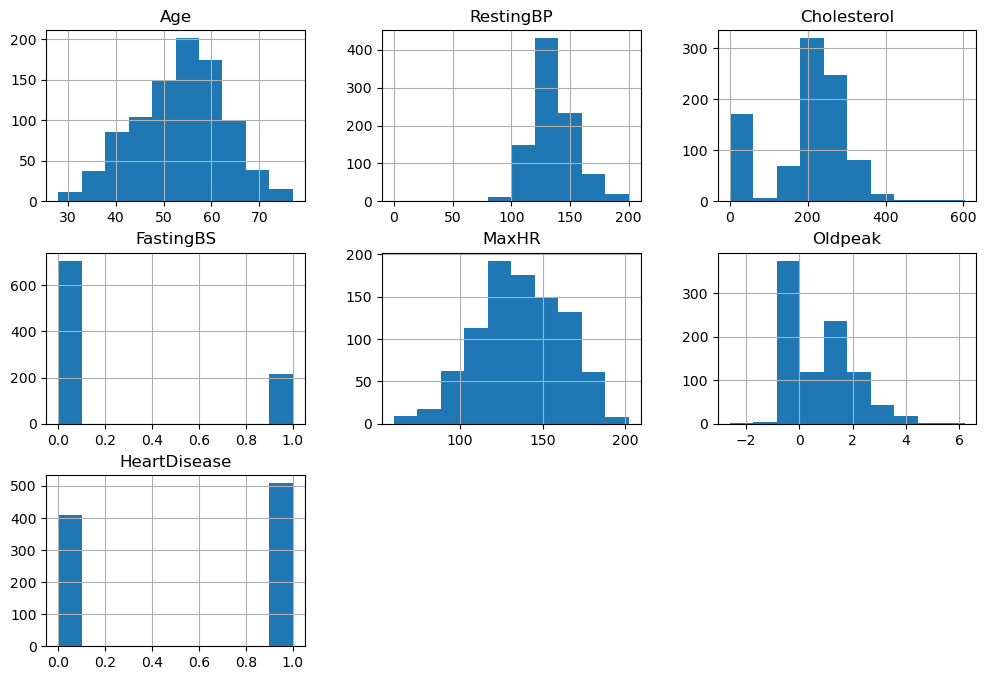

In [159]:
data.hist(figsize=(12,8))
plt.show()

In [160]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Sayısal sütunlar:",numeric_cols)

Sayısal sütunlar: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [161]:
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()

print("Kategorik sütunlar:",cat_cols)

Kategorik sütunlar: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [162]:
corr_matrix = data[numeric_cols].corr()

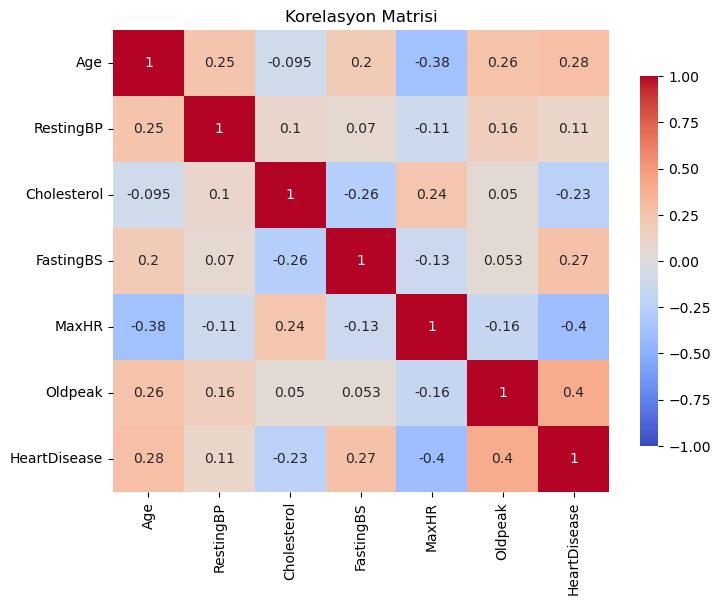

In [163]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title("Korelasyon Matrisi")
plt.show()

In [164]:
data['Age'].value_counts()

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

In [165]:
data['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [166]:
data.groupby(['Age'],as_index=False)[['Sex']].count()

,Age,Sex
0,28,1
1,29,3
2,30,1
3,31,2
4,32,5
5,33,2
6,34,7
7,35,11
8,36,6
9,37,11


In [167]:
pd.crosstab( data['Age'],data['HeartDisease'],margins=True)

HeartDisease,0,1,All
Age,,,
28,1,0,1
29,3,0,3
30,1,0,1
31,1,1,2
32,3,2,5
33,1,1,2
34,5,2,7
35,7,4,11
36,4,2,6


In [168]:
sex_value = data['Sex'].value_counts()

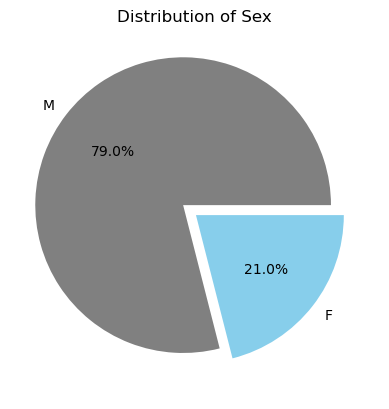

In [169]:
plt.pie(sex_value,labels=sex_value.index,autopct='%1.1f%%',colors=['grey','skyblue'],explode=[.1,.01])
plt.title('Distribution of Sex')
plt.show()

In [170]:
pd.crosstab( data['Sex'],data['HeartDisease'],margins=True)

HeartDisease,0,1,All
Sex,,,
F,143,50,193
M,267,458,725
All,410,508,918


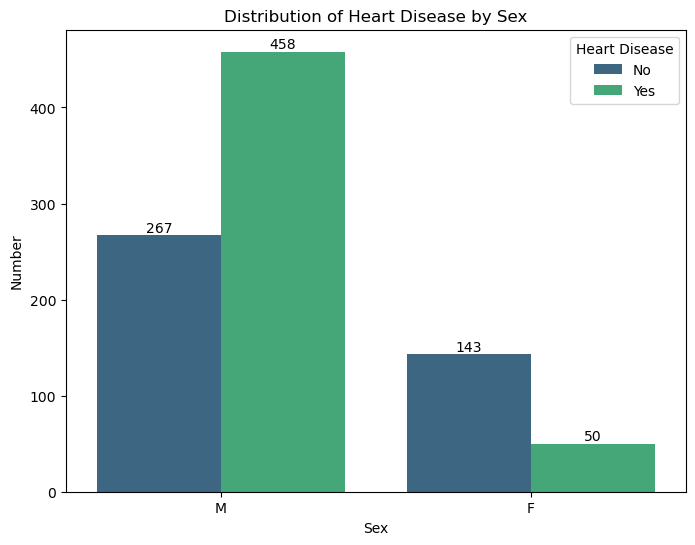

In [171]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='Sex', hue='HeartDisease', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title("Distribution of Heart Disease by Sex")
plt.xlabel("Sex")
plt.ylabel("Number")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

In [172]:
pd.crosstab(data['Sex'],data['RestingECG'],margins=True)

RestingECG,LVH,Normal,ST,All
Sex,,,,
F,47,118,28,193
M,141,434,150,725
All,188,552,178,918


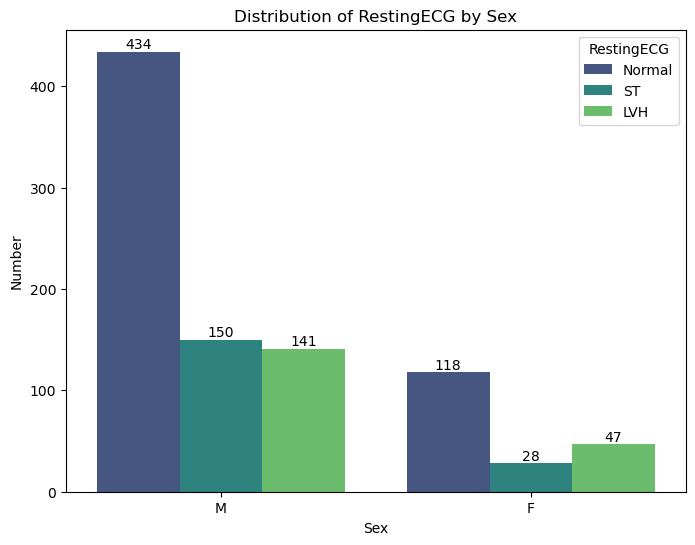

In [173]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='Sex', hue='RestingECG', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title("Distribution of RestingECG by Sex")
plt.xlabel("Sex")
plt.ylabel("Number")
plt.legend(title="RestingECG", labels=data['RestingECG'].unique())
plt.show()

In [174]:
pd.crosstab(data['Sex'],data['ChestPainType'],margins=True)

ChestPainType,ASY,ATA,NAP,TA,All
Sex,,,,,
F,70,60,53,10,193
M,426,113,150,36,725
All,496,173,203,46,918


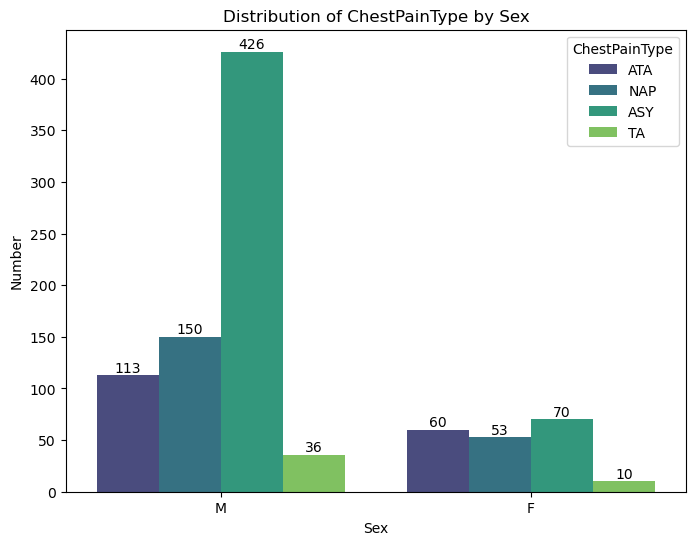

In [175]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='Sex', hue='ChestPainType', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title("Distribution of ChestPainType by Sex")
plt.xlabel("Sex")
plt.ylabel("Number")
plt.legend(title="ChestPainType", labels=data['ChestPainType'].unique())
plt.show()

In [176]:
pd.crosstab(data['Sex'],data['ExerciseAngina'],margins=True)

ExerciseAngina,N,Y,All
Sex,,,
F,150,43,193
M,397,328,725
All,547,371,918


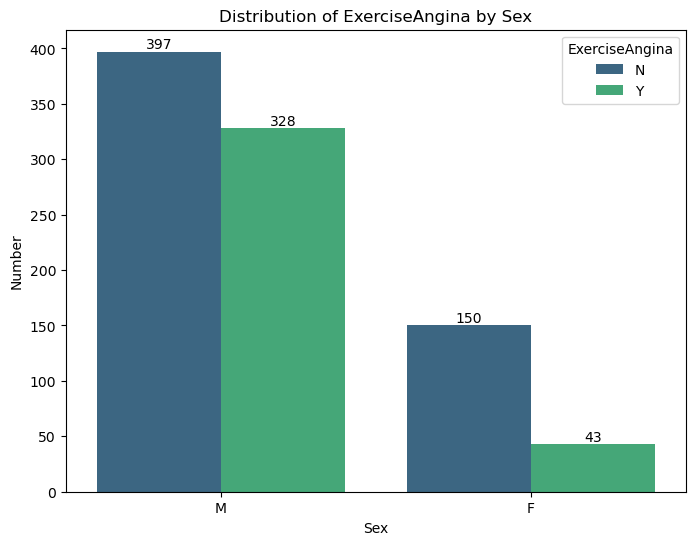

In [177]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='Sex', hue='ExerciseAngina', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title("Distribution of ExerciseAngina by Sex")
plt.xlabel("Sex")
plt.ylabel("Number")
plt.legend(title="ExerciseAngina", labels=data['ExerciseAngina'].unique())
plt.show()

In [178]:
pd.crosstab(data['Sex'],data['ST_Slope'],margins=True)

ST_Slope,Down,Flat,Up,All
Sex,,,,
F,7,75,111,193
M,56,385,284,725
All,63,460,395,918


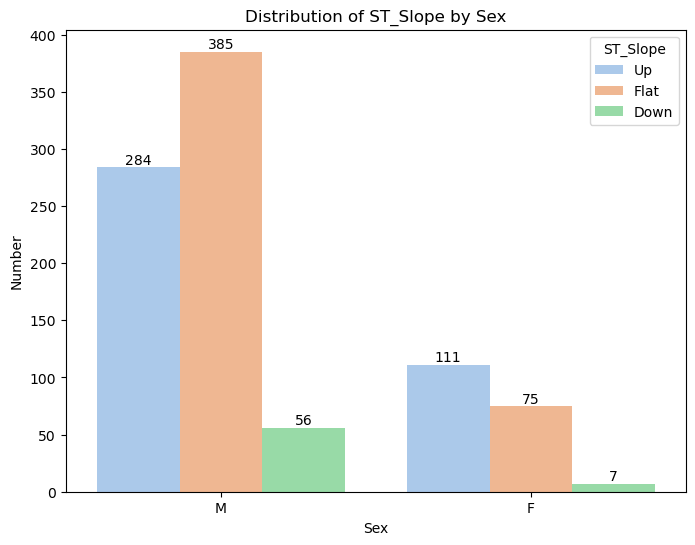

In [179]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='Sex', hue='ST_Slope', palette='pastel')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title("Distribution of ST_Slope by Sex")
plt.xlabel("Sex")
plt.ylabel("Number")
plt.legend(title="ST_Slope", labels=data['ST_Slope'].unique())
plt.show()

In [180]:
data['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [181]:
pd.crosstab(data['ChestPainType'],data['HeartDisease'],margins=True)

HeartDisease,0,1,All
ChestPainType,,,
ASY,104,392,496
ATA,149,24,173
NAP,131,72,203
TA,26,20,46
All,410,508,918


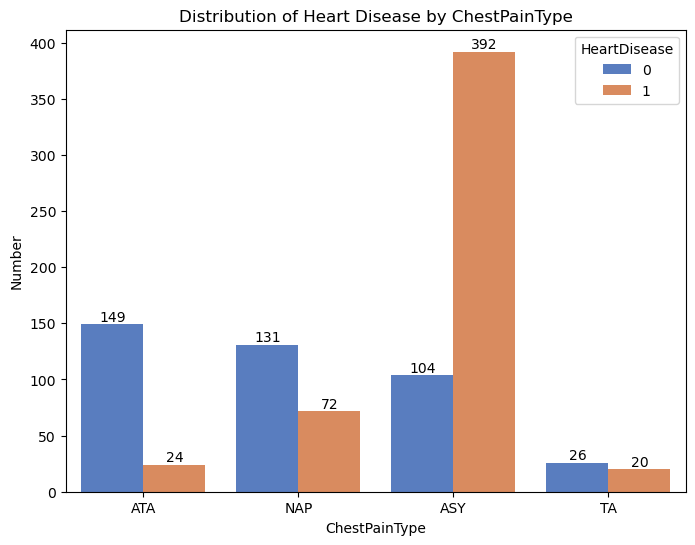

In [182]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='ChestPainType', hue='HeartDisease', palette='muted')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title("Distribution of Heart Disease by ChestPainType")
plt.xlabel("ChestPainType")
plt.ylabel("Number")
plt.legend(title="HeartDisease", labels=data['HeartDisease'].unique())
plt.show()

In [183]:
data['RestingBP'].value_counts()

RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: count, Length: 67, dtype: int64

In [184]:
pd.crosstab(data['RestingBP'],data['HeartDisease'],margins=True)

HeartDisease,0,1,All
RestingBP,,,
0,0,1,1
80,1,0,1
92,0,1,1
94,2,0,2
95,0,6,6
...,...,...,...
185,0,1,1
190,1,1,2
192,0,1,1


In [185]:
FastingBS = data['FastingBS'].value_counts()

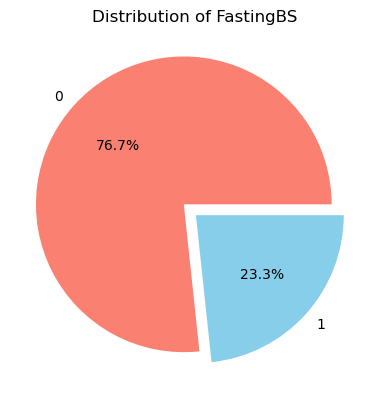

In [186]:
plt.pie(FastingBS,labels=FastingBS.index,autopct='%1.1f%%',colors=['salmon','skyblue'],explode=[.1,.01])
plt.title('Distribution of FastingBS')
plt.show()

In [187]:
pd.crosstab(data['FastingBS'],data['HeartDisease'],margins=True)

HeartDisease,0,1,All
FastingBS,,,
0,366,338,704
1,44,170,214
All,410,508,918


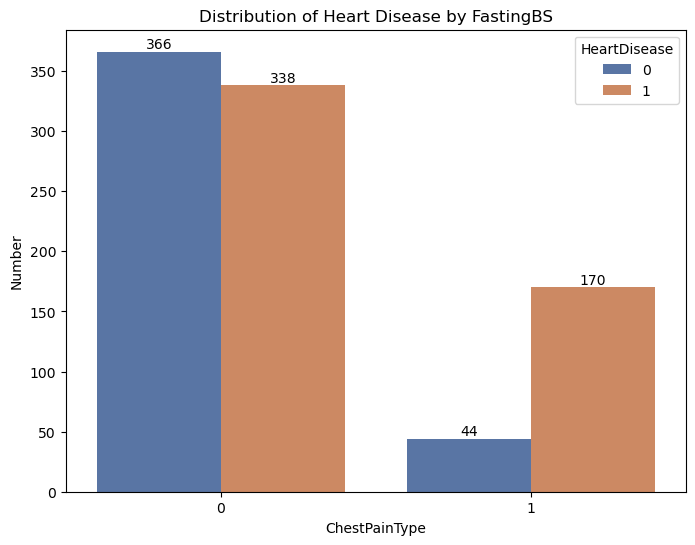

In [188]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='FastingBS', hue='HeartDisease', palette='deep')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title("Distribution of Heart Disease by FastingBS")
plt.xlabel("ChestPainType")
plt.ylabel("Number")
plt.legend(title="HeartDisease", labels=data['HeartDisease'].unique())
plt.show()

In [189]:
RestingECG = data['RestingECG'].value_counts()

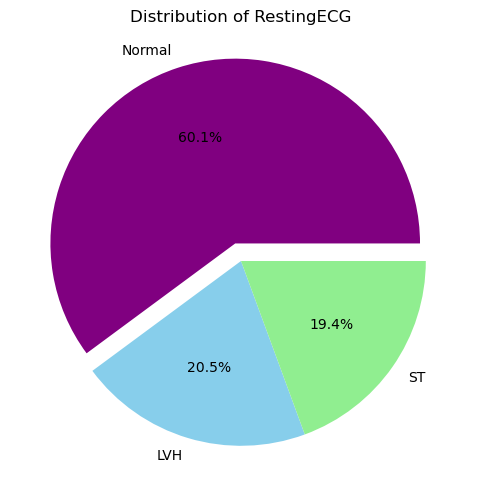

In [190]:
explode = [0.1] + [0] * (len(RestingECG) - 1)
colors = ['purple', 'skyblue', 'lightgreen', 'salmon'][:len(RestingECG)]

plt.figure(figsize=(8, 6))
plt.pie(RestingECG, labels=RestingECG.index, autopct='%1.1f%%', colors=colors, explode=explode)
plt.title('Distribution of RestingECG')
plt.show()

In [191]:
pd.crosstab(data['RestingECG'],data['HeartDisease'])

HeartDisease,0,1
RestingECG,,
LVH,82,106
Normal,267,285
ST,61,117


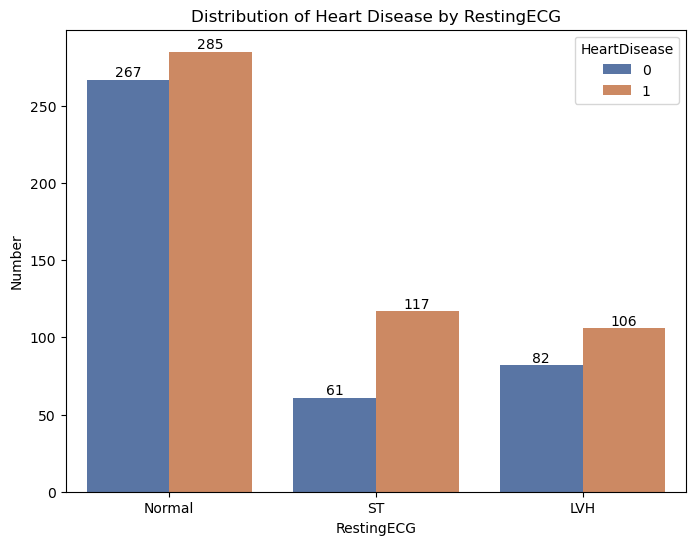

In [192]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='RestingECG', hue='HeartDisease', palette='deep')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title("Distribution of Heart Disease by RestingECG")
plt.xlabel("RestingECG")
plt.ylabel("Number")
plt.legend(title="HeartDisease", labels=data['HeartDisease'].unique())
plt.show()

In [193]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

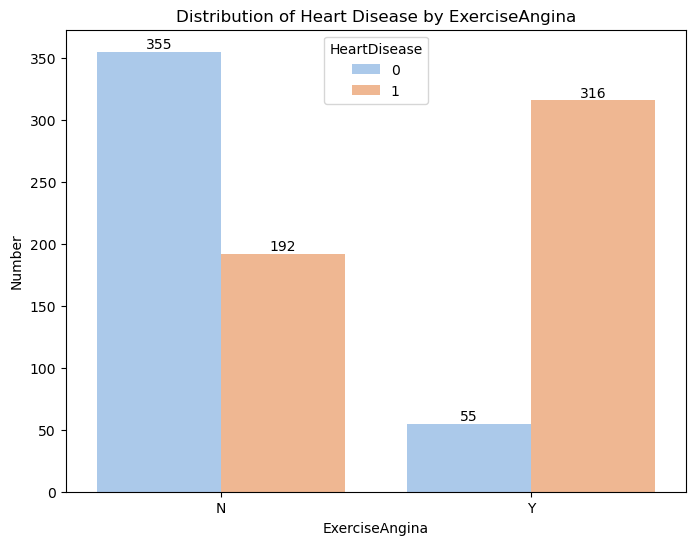

In [194]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='ExerciseAngina', hue='HeartDisease', palette='pastel')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title("Distribution of Heart Disease by ExerciseAngina")
plt.xlabel("ExerciseAngina")
plt.ylabel("Number")
plt.legend(title="HeartDisease", labels=data['HeartDisease'].unique())
plt.show()

In [195]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

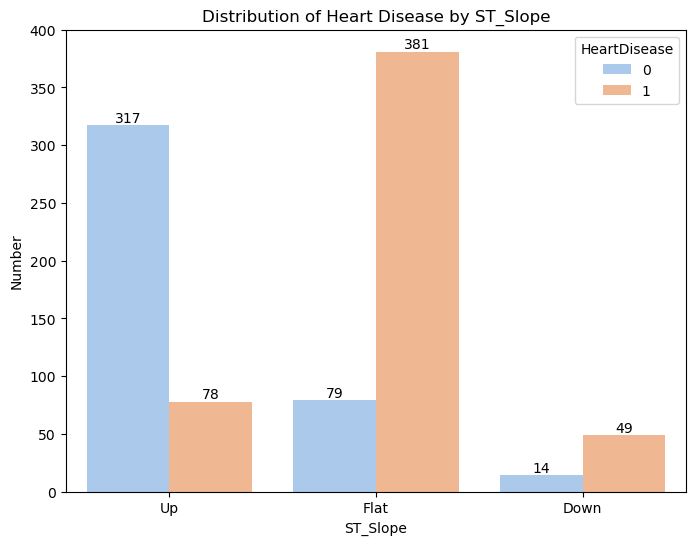

In [196]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='ST_Slope', hue='HeartDisease', palette='pastel')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title("Distribution of Heart Disease by ST_Slope")
plt.xlabel("ST_Slope")
plt.ylabel("Number")
plt.legend(title="HeartDisease", labels=data['HeartDisease'].unique())
plt.show()

In [197]:
HeartDisease = data['HeartDisease'].value_counts()
HeartDisease

HeartDisease
1    508
0    410
Name: count, dtype: int64

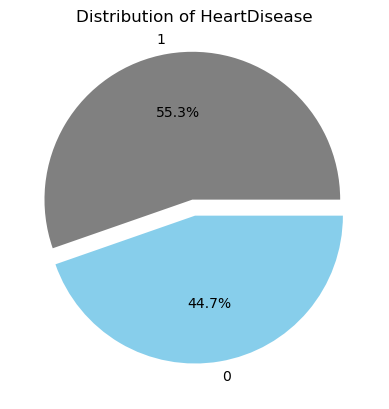

In [198]:
plt.pie(HeartDisease,labels=HeartDisease.index,autopct='%1.1f%%',colors=['grey','skyblue'],explode=[.1,.01])
plt.title('Distribution of HeartDisease')
plt.show()

In [199]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

label_encoder = LabelEncoder()

data['Sex'] = label_encoder.fit_transform(data['Sex'])  
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina']) 

data = pd.get_dummies(data, columns=['ChestPainType', 'RestingECG'], drop_first=True)

ordinal_encoder = OrdinalEncoder(categories=[['Up', 'Flat', 'Down']])
data['ST_Slope'] = ordinal_encoder.fit_transform(data[['ST_Slope']])

In [200]:
data.shape

(918, 15)

In [201]:
X = data.drop(['HeartDisease'],axis=1)
y = data['HeartDisease']

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [203]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

numeric_cols.remove('HeartDisease')

X_train[numeric_cols] = sc.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = sc.transform(X_test[numeric_cols])

In [204]:
!pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable


In [205]:
from sklearn.svm import SVC
from skopt import BayesSearchCV

svc = SVC(class_weight='balanced')

param_dist_svc = {
    'C': (0.1, 1000),               
    'kernel': ['linear', 'rbf'],  
    'gamma': (1e-4, 1e1, 'uniform'),  
    'degree': (2, 5),                
}

bayes_search_svc = BayesSearchCV(
    estimator=svc,
    search_spaces=param_dist_svc,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

bayes_search_svc.fit(X_train, y_train)
best_params_bayes_svc = bayes_search_svc.best_params_
print(f"Bayesian Search ile bulunan en iyi hiperparametreler (SVC): {best_params_bayes_svc}")

Bayesian Search ile bulunan en iyi hiperparametreler (SVC): OrderedDict({'C': 994.2922290669318, 'degree': 3, 'gamma': 0.005887390074555474, 'kernel': 'rbf'})


In [206]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights='distance')

param_dist_knn = {
    'n_neighbors': (1, 20),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

bayes_search_knn = BayesSearchCV(
    estimator=knn,
    search_spaces=param_dist_knn,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

bayes_search_knn.fit(X_train, y_train)
best_params_bayes_knn = bayes_search_knn.best_params_
print(f"Bayesian Search ile bulunan en iyi hiperparametreler (KNN): {best_params_bayes_knn}")

Bayesian Search ile bulunan en iyi hiperparametreler (KNN): OrderedDict({'metric': 'manhattan', 'n_neighbors': 12})


In [207]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')

param_dist_rf = {
    'n_estimators': (10, 200),         
    'max_depth': (1, 20),               
    'min_samples_split': (2, 20),      
    'min_samples_leaf': (1, 10),        
}

bayes_search_rf = BayesSearchCV(
    estimator=rf,
    search_spaces=param_dist_rf,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

bayes_search_rf.fit(X_train, y_train)
best_params_bayes_rf = bayes_search_rf.best_params_
print(f"Bayesian Search ile bulunan en iyi hiperparametreler (Random Forest): {best_params_bayes_rf}")


Bayesian Search ile bulunan en iyi hiperparametreler (Random Forest): OrderedDict({'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200})


In [208]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight='balanced')

param_dist_log_reg = {
    'C': (0.01, 1000),              
    'penalty': ['l1', 'l2', 'elasticnet'],  
    'solver': ['saga'],  
    'max_iter': (100, 1000),          
    'l1_ratio': (0.0, 1.0)            
}

bayes_search_log_reg = BayesSearchCV(
    estimator=log_reg,
    search_spaces=param_dist_log_reg,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

bayes_search_log_reg.fit(X_train, y_train)
best_params_bayes_log_reg = bayes_search_log_reg.best_params_
print(f"Bayesian Search ile bulunan en iyi hiperparametreler (Logistic Regression): {best_params_bayes_log_reg}")

Bayesian Search ile bulunan en iyi hiperparametreler (Logistic Regression): OrderedDict({'C': 3.6402709516706793, 'l1_ratio': 0.8178300196637516, 'max_iter': 767, 'penalty': 'l1', 'solver': 'saga'})


C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [209]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

param_dist_gnb = {
    'var_smoothing': (1e-9, 1e-1, 'uniform'),  
}

bayes_search_gnb = BayesSearchCV(
    estimator=gnb,
    search_spaces=param_dist_gnb,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

bayes_search_gnb.fit(X_train, y_train)
best_params_bayes_gnb = bayes_search_gnb.best_params_

print(f"Bayesian Search ile bulunan en iyi hiperparametreler (Gaussian Naive Bayes): {best_params_bayes_gnb}")


Bayesian Search ile bulunan en iyi hiperparametreler (Gaussian Naive Bayes): OrderedDict({'var_smoothing': 0.05434030722562819})


In [210]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

param_dist_bnb = {
    'alpha': (1e-10, 10, 'uniform'),  
}

bayes_search_bnb = BayesSearchCV(
    estimator=bnb,
    search_spaces=param_dist_bnb,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

bayes_search_bnb.fit(X_train, y_train)
best_params_bayes_bnb = bayes_search_bnb.best_params_
print(f"Bayesian Search ile bulunan en iyi hiperparametreler (Bernoulli Naive Bayes): {best_params_bayes_bnb}")

Bayesian Search ile bulunan en iyi hiperparametreler (Bernoulli Naive Bayes): OrderedDict({'alpha': 4.101039588592128})


In [211]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()

param_dist_gb = {
    'n_estimators': (50, 500),           
    'learning_rate': (0.001, 0.1, 'uniform'),  
    'max_depth': (3, 10),                
    'min_samples_split': (2, 20),        
    'min_samples_leaf': (1, 20),         
    'subsample': (0.5, 1.0, 'uniform'),  
    'max_features': (0.1, 1.0, 'uniform') 
}

bayes_search_gb = BayesSearchCV(
    estimator=gb_clf,
    search_spaces=param_dist_gb,
    n_iter=30,                        
    cv=5,                              
    scoring='accuracy',                
    n_jobs=-1,                         
    random_state=42
)

bayes_search_gb.fit(X_train, y_train)

best_params_bayes_gb = bayes_search_gb.best_params_
print(f"Bayesian Search ile bulunan en iyi hiperparametreler (Gradient Boosting): {best_params_bayes_gb}")

Bayesian Search ile bulunan en iyi hiperparametreler (Gradient Boosting): OrderedDict({'learning_rate': 0.03926373890831061, 'max_depth': 3, 'max_features': 0.4534033625051693, 'min_samples_leaf': 10, 'min_samples_split': 6, 'n_estimators': 434, 'subsample': 0.5262185505035823})


In [212]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(class_weight='balanced')

param_dist_dt = {
    'max_depth': (1, 20),               
    'min_samples_split': (2, 20),        
    'min_samples_leaf': (1, 20),         
    'criterion': ['gini', 'entropy'],   
    'max_features': (0.1, 1.0, 'uniform') 
}

bayes_search_dt = BayesSearchCV(
    estimator=dt_clf,
    search_spaces=param_dist_dt,
    n_iter=30,                        
    cv=5,                              
    scoring='accuracy',                
    n_jobs=-1,                         
    random_state=42
)

bayes_search_dt.fit(X_train, y_train)

best_params_bayes_dt = bayes_search_dt.best_params_
print(f"Bayesian Search ile bulunan en iyi hiperparametreler (Decision Tree): {best_params_bayes_dt}")

Bayesian Search ile bulunan en iyi hiperparametreler (Decision Tree): OrderedDict({'criterion': 'gini', 'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 7, 'min_samples_split': 3})


In [213]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))

param_dist_xgb = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (50, 500),
    'gamma': (0, 1.0, 'uniform'),
    'subsample': (0.5, 1.0, 'uniform'),
    'colsample_bytree': (0.5, 1.0, 'uniform')
}

bayes_search_xgb = BayesSearchCV(
    estimator=xgb_clf,
    search_spaces=param_dist_xgb,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

bayes_search_xgb.fit(X_train, y_train)
best_params_bayes_xgb = bayes_search_xgb.best_params_
print(f"Bayesian Search ile bulunan en iyi hiperparametreler (XGBoost): {best_params_bayes_xgb}")

Bayesian Search ile bulunan en iyi hiperparametreler (XGBoost): OrderedDict({'colsample_bytree': 0.6622333074599565, 'gamma': 0.39622778431378247, 'learning_rate': 0.04067123214616171, 'max_depth': 4, 'n_estimators': 468, 'subsample': 0.993554830415429})


In [214]:
from catboost import CatBoostClassifier

class_weights = [len(y_train) / (2 * sum(y_train == 0)), len(y_train) / (2 * sum(y_train == 1))]
catboost_clf = CatBoostClassifier(class_weights=class_weights, verbose=0)

param_dist_catboost = {
    'depth': (3, 10),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'iterations': (50, 500),
    'l2_leaf_reg': (1, 10, 'uniform'),
    'border_count': (32, 255)
}

bayes_search_catboost = BayesSearchCV(
    estimator=catboost_clf,
    search_spaces=param_dist_catboost,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

bayes_search_catboost.fit(X_train, y_train)
best_params_bayes_catboost = bayes_search_catboost.best_params_
print(f"Bayesian Search ile bulunan en iyi hiperparametreler (CatBoost): {best_params_bayes_catboost}")

Bayesian Search ile bulunan en iyi hiperparametreler (CatBoost): OrderedDict({'border_count': 249, 'depth': 5, 'iterations': 500, 'l2_leaf_reg': 9, 'learning_rate': 0.014926748673886483})


In [215]:
"""from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': LogisticRegression(**best_params_bayes_log_reg),
    'SVM': SVC(**best_params_bayes_svc),
    #'Kernel SVM': SVC(kernel='rbf', **best_params_bayes_kernel_svc), xgboost catbosot 
    'Gradient Boosting': GradientBoostingClassifier(**best_params_bayes_gb),
    'Decision Tree': DecisionTreeClassifier(**best_params_bayes_dt),
    'Random Forest': RandomForestClassifier(**best_params_bayes_rf),
    'BernoulliNB': BernoulliNB(**best_params_bayes_bnb),
    'GaussianNB': GaussianNB(**best_params_bayes_gnb),
    'K-Nearest Neighbors': KNeighborsClassifier(**best_params_bayes_knn)
}

accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')

cross_val_results_train = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=accuracy_scorer)
    precision_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=precision_scorer)
    recall_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=recall_scorer)
    f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=f1_scorer)
    
    cross_val_results_train['Model'].append(model_name)
    cross_val_results_train['Accuracy'].append(f"{np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
    cross_val_results_train['Precision'].append(f"{np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
    cross_val_results_train['Recall'].append(f"{np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
    cross_val_results_train['F1 Score'].append(f"{np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

cross_val_results_train_df = pd.DataFrame(cross_val_results_train)
print(cross_val_results_train_df)"""

'from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score\nfrom sklearn.model_selection import cross_val_score\n\nmodels = {\n    \'Logistic Regression\': LogisticRegression(**best_params_bayes_log_reg),\n    \'SVM\': SVC(**best_params_bayes_svc),\n    #\'Kernel SVM\': SVC(kernel=\'rbf\', **best_params_bayes_kernel_svc), xgboost catbosot \n    \'Gradient Boosting\': GradientBoostingClassifier(**best_params_bayes_gb),\n    \'Decision Tree\': DecisionTreeClassifier(**best_params_bayes_dt),\n    \'Random Forest\': RandomForestClassifier(**best_params_bayes_rf),\n    \'BernoulliNB\': BernoulliNB(**best_params_bayes_bnb),\n    \'GaussianNB\': GaussianNB(**best_params_bayes_gnb),\n    \'K-Nearest Neighbors\': KNeighborsClassifier(**best_params_bayes_knn)\n}\n\naccuracy_scorer = make_scorer(accuracy_score)\nprecision_scorer = make_scorer(precision_score, average=\'weighted\')\nrecall_scorer = make_scorer(recall_score, average=\'weighted\')\nf1_scorer = 

In [216]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': LogisticRegression(**best_params_bayes_log_reg),
    'SVM': SVC(**best_params_bayes_svc),
    'Gradient Boosting': GradientBoostingClassifier(**best_params_bayes_gb),
    'Decision Tree': DecisionTreeClassifier(**best_params_bayes_dt),
    'Random Forest': RandomForestClassifier(**best_params_bayes_rf),
    'BernoulliNB': BernoulliNB(**best_params_bayes_bnb),
    'GaussianNB': GaussianNB(**best_params_bayes_gnb),
    'K-Nearest Neighbors': KNeighborsClassifier(**best_params_bayes_knn),
    'XGBoost': XGBClassifier(**best_params_bayes_xgb),
    'CatBoost': CatBoostClassifier(**best_params_bayes_catboost, verbose=0)
}

accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')

cross_val_results_train = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=accuracy_scorer)
    precision_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=precision_scorer)
    recall_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=recall_scorer)
    f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=f1_scorer)
    
    cross_val_results_train['Model'].append(model_name)
    cross_val_results_train['Accuracy'].append(f"{np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
    cross_val_results_train['Precision'].append(f"{np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
    cross_val_results_train['Recall'].append(f"{np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
    cross_val_results_train['F1 Score'].append(f"{np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

cross_val_results_train_df = pd.DataFrame(cross_val_results_train)
print(cross_val_results_train_df)

C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when pena

                 Model         Accuracy        Precision           Recall  \
0  Logistic Regression  0.8406 ± 0.0275  0.8409 ± 0.0275  0.8406 ± 0.0275   
1                  SVM  0.8556 ± 0.0201  0.8560 ± 0.0200  0.8556 ± 0.0201   
2    Gradient Boosting  0.8706 ± 0.0205  0.8755 ± 0.0169  0.8747 ± 0.0184   
3        Decision Tree  0.8488 ± 0.0197  0.8478 ± 0.0154  0.8461 ± 0.0173   
4        Random Forest  0.8652 ± 0.0197  0.8705 ± 0.0145  0.8679 ± 0.0173   
5          BernoulliNB  0.8365 ± 0.0209  0.8373 ± 0.0202  0.8365 ± 0.0209   
6           GaussianNB  0.8434 ± 0.0253  0.8436 ± 0.0254  0.8434 ± 0.0253   
7  K-Nearest Neighbors  0.8611 ± 0.0248  0.8616 ± 0.0240  0.8611 ± 0.0248   
8              XGBoost  0.8761 ± 0.0239  0.8761 ± 0.0239  0.8761 ± 0.0239   
9             CatBoost  0.8774 ± 0.0159  0.8780 ± 0.0162  0.8774 ± 0.0159   

          F1 Score  
0  0.8405 ± 0.0274  
1  0.8554 ± 0.0200  
2  0.8760 ± 0.0187  
3  0.8488 ± 0.0194  
4  0.8715 ± 0.0177  
5  0.8365 ± 0.0209  
6  0.

C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


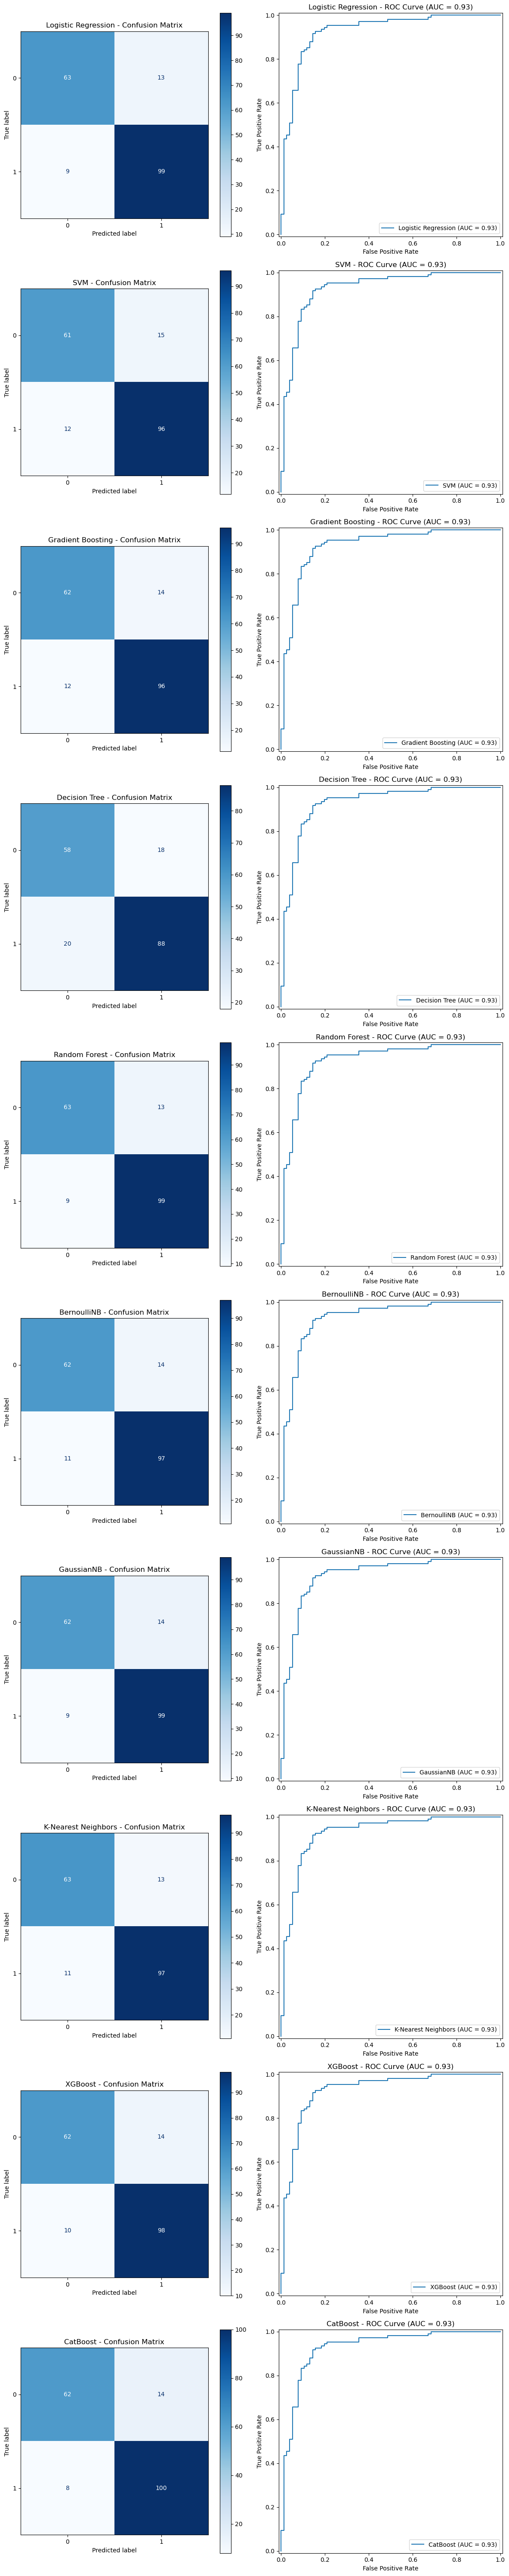

In [217]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

y_pred_all = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    y_pred_all[model_name] = y_pred  

fig, axes = plt.subplots(len(models), 2, figsize=(12, 6 * len(models)))

for idx, (model_name, y_pred) in enumerate(y_pred_all.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx, 0], cmap='Blues')
    axes[idx, 0].set_title(f'{model_name} - Confusion Matrix')
    
    if len(set(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_name).plot(ax=axes[idx, 1])
        axes[idx, 1].set_title(f'{model_name} - ROC Curve (AUC = {roc_auc:.2f})')
    else:
        axes[idx, 1].axis('off')  

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

threshold = 0.85
high_corr_features = [
    column for column in corr_matrix.columns
    if any(corr_matrix[column] > threshold) and column != corr_matrix[column].idxmax()
]

X_train_filtered = X_train.drop(columns=high_corr_features)
X_test_filtered = X_test.drop(columns=high_corr_features)

print(f"Kalan Özellik Sayısı: {X_train_filtered.shape[1]}")
print("Çıkarılan Yüksek Korelasyonlu Özellikler:", high_corr_features)

accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')

cross_val_results_train = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

models = {
    'Logistic Regression': LogisticRegression(**best_params_bayes_log_reg),
    'SVM': SVC(**best_params_bayes_svc),
    #'Kernel SVM': SVC(kernel='rbf', **best_params_bayes_kernel_svc),
    'Gradient Boosting': GradientBoostingClassifier(**best_params_bayes_gb),
    'Decision Tree': DecisionTreeClassifier(**best_params_bayes_dt),
    'Random Forest': RandomForestClassifier(**best_params_bayes_rf),
    'BernoulliNB': BernoulliNB(**best_params_bayes_bnb),
    'GaussianNB': GaussianNB(**best_params_bayes_gnb),
    'K-Nearest Neighbors': KNeighborsClassifier(**best_params_bayes_knn)
}

for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X_train_filtered, y_train, cv=5, scoring=accuracy_scorer)
    precision_scores = cross_val_score(model, X_train_filtered, y_train, cv=5, scoring=precision_scorer)
    recall_scores = cross_val_score(model, X_train_filtered, y_train, cv=5, scoring=recall_scorer)
    f1_scores = cross_val_score(model, X_train_filtered, y_train, cv=5, scoring=f1_scorer)
    
    cross_val_results_train['Model'].append(model_name)
    cross_val_results_train['Accuracy'].append(f"{np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
    cross_val_results_train['Precision'].append(f"{np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
    cross_val_results_train['Recall'].append(f"{np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
    cross_val_results_train['F1 Score'].append(f"{np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

cross_val_results_train_df = pd.DataFrame(cross_val_results_train)
print(cross_val_results_train_df)

Kalan Özellik Sayısı: 14
Çıkarılan Yüksek Korelasyonlu Özellikler: []


C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when pena

In [151]:
feature_importance_dict = {}

models_with_importance = [
    'Logistic Regression', 
    'SVM', 
    'Gradient Boosting', 
    'Decision Tree', 
    'Random Forest', 
    'XGBoost', 
    'CatBoost'
]

for model_name, model in models.items():
    model.fit(X_train_filtered, y_train)
    
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        
        if feature_importance is not None:
            feature_importance_dict[model_name] = feature_importance
            
    elif hasattr(model, 'coef_'):
        feature_importance = abs(model.coef_[0])  
        feature_importance_dict[model_name] = feature_importance
    
    elif isinstance(model, SVC) and model.kernel == 'linear':
        feature_importance = abs(model.coef_[0])
        feature_importance_dict[model_name] = feature_importance

feature_names = X_train_filtered.columns

plt.figure(figsize=(12, 12))

for i, model_name in enumerate(feature_importance_dict):
    plt.subplot(3, 3, i+1)
    feature_importance = feature_importance_dict[model_name]
    
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()

plt.show()

<Figure size 1200x1200 with 0 Axes>

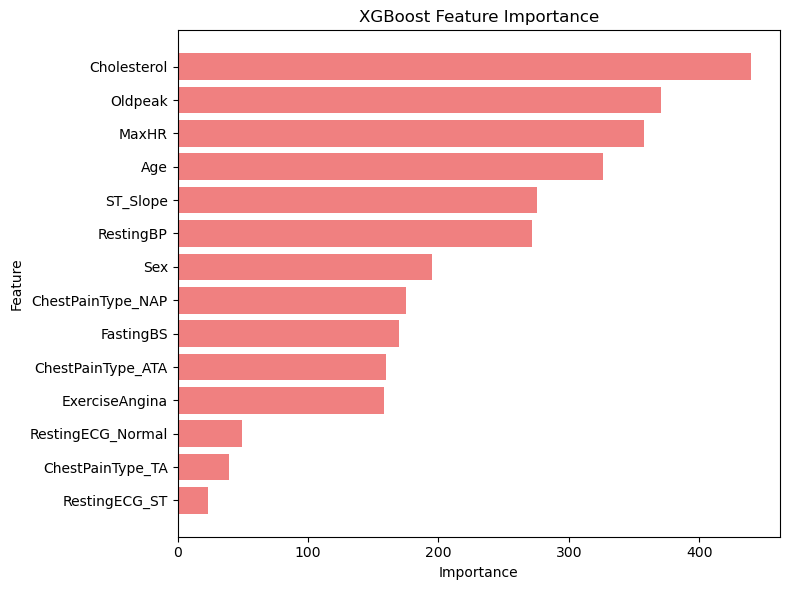

In [149]:
xgb_model = XGBClassifier(**best_params_bayes_xgb)
xgb_model.fit(X_train_filtered, y_train)

xgb_importance = xgb_model.get_booster().get_score(importance_type='weight')

xgb_importance_df = pd.DataFrame(list(xgb_importance.items()), columns=['Feature', 'Importance'])
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='lightcoral')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

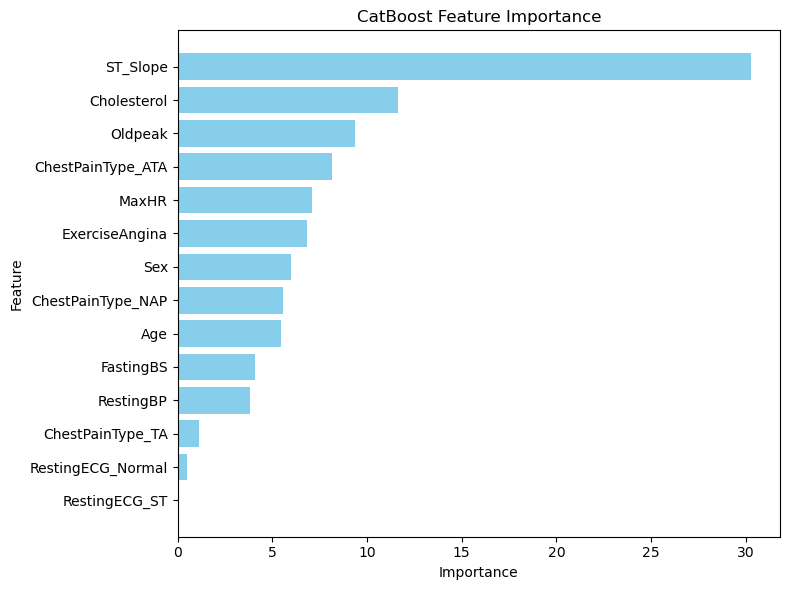

In [146]:
catboost_model = CatBoostClassifier(**best_params_bayes_catboost, verbose=0)
catboost_model.fit(X_train_filtered, y_train)

catboost_importance = catboost_model.get_feature_importance()
catboost_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': catboost_importance})
catboost_importance_df = catboost_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(catboost_importance_df['Feature'], catboost_importance_df['Importance'], color='skyblue')
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

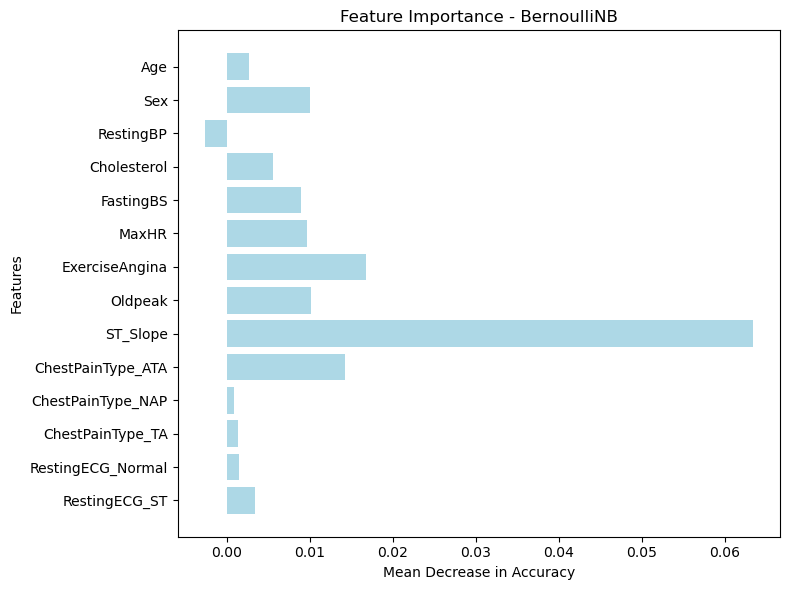

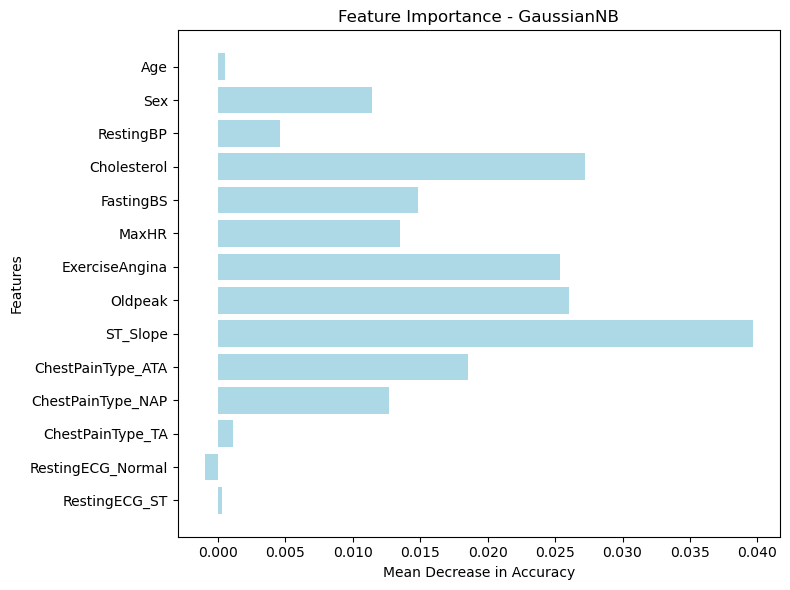

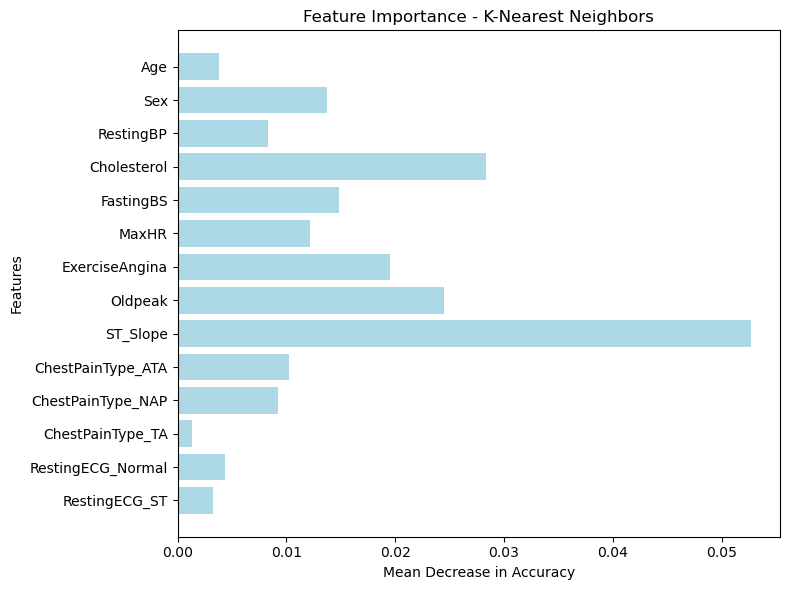

In [145]:
from sklearn.inspection import permutation_importance

models = {
    'BernoulliNB': BernoulliNB(**best_params_bayes_bnb),
    'GaussianNB': GaussianNB(**best_params_bayes_gnb),
    'K-Nearest Neighbors': KNeighborsClassifier(**best_params_bayes_knn)
}

importance_results = {}

for model_name, model in models.items():
    
    model.fit(X_train_filtered, y_train)

    result = permutation_importance(model, X_train_filtered, y_train, n_repeats=10, random_state=42)
    
    importance_results[model_name] = result.importances_mean

    plt.figure(figsize=(8, 6))
    plt.barh(X_train_filtered.columns, result.importances_mean, color='lightblue')
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Mean Decrease in Accuracy')
    plt.ylabel('Features')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()